In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
no_learning_df = pd.read_csv("/home/spsalmon/asexual_agent_based/simulation_results/asexual_test_random_mating_no_learning.csv")
learning_df = pd.read_csv("/home/spsalmon/asexual_agent_based/simulation_results/asexual_test_random_mating_with_learning_0.15.csv")

average_no_learning = no_learning_df.groupby('time')[['mean_b', 'mean_lmax']].mean().reset_index()
std_no_learning = no_learning_df.groupby('time')[['mean_b', 'mean_lmax']].std().reset_index()

average_learning = learning_df.groupby('time')[['mean_b', 'mean_lmax']].mean().reset_index()
std_learning = learning_df.groupby('time')[['mean_b', 'mean_lmax']].std().reset_index()

confidence_interval_no_learning = 1.96*std_no_learning/np.sqrt(no_learning_df['replicate_id'].unique().shape[0])
confidence_interval_learning = 1.96*std_learning/np.sqrt(learning_df['replicate_id'].unique().shape[0])

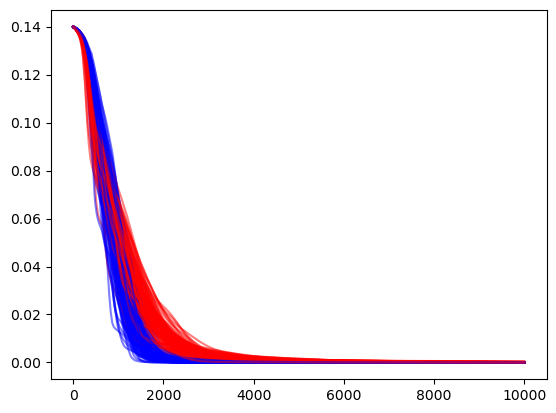

In [9]:
for replicate in learning_df['replicate_id'].unique():
    plt.plot(no_learning_df[no_learning_df['replicate_id'] == replicate]['time'], no_learning_df[no_learning_df['replicate_id'] == replicate]['mean_b'], color = 'blue', alpha = 0.5)
    plt.plot(learning_df[learning_df['replicate_id'] == replicate]['time'], learning_df[learning_df['replicate_id'] == replicate]['mean_b'], color = 'red', alpha = 0.5)
plt.show()

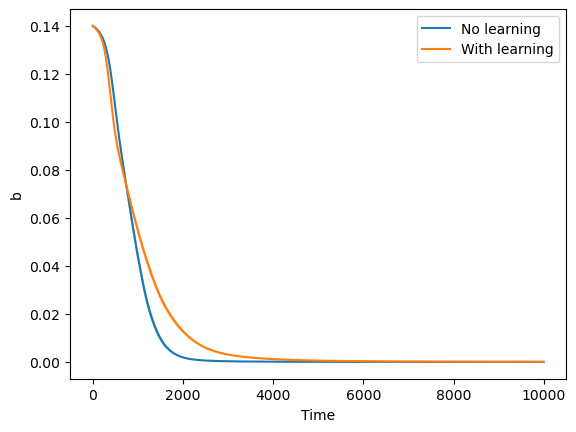

In [10]:
plt.plot(average_no_learning['time'], average_no_learning['mean_b'], label = "No learning")
plt.fill_between(average_no_learning['time'], (average_no_learning['mean_b'] - confidence_interval_no_learning['mean_b']).to_numpy(), (average_no_learning['mean_b'] + confidence_interval_no_learning['mean_b']).to_numpy(), alpha = 0.5) # type: ignore

plt.plot(average_learning['time'], average_learning['mean_b'], label = "With learning")
plt.fill_between(average_learning['time'], (average_learning['mean_b'] - confidence_interval_learning['mean_b']).to_numpy(), (average_learning['mean_b'] + confidence_interval_learning['mean_b']).to_numpy(), alpha = 0.5) # type: ignore

plt.legend()
plt.xlabel("Time")
plt.ylabel("b")

plt.show()

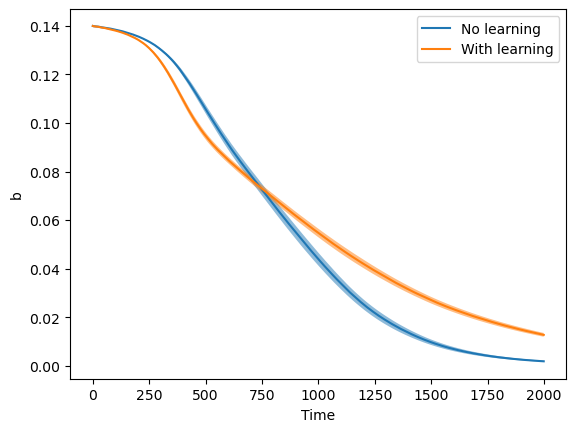

In [11]:
# plot only the first 2000 time steps
plt.plot(average_no_learning['time'][:2000], average_no_learning['mean_b'][:2000], label = "No learning")
plt.fill_between(average_no_learning['time'][:2000], (average_no_learning['mean_b'] - confidence_interval_no_learning['mean_b'])[:2000].to_numpy(), (average_no_learning['mean_b'] + confidence_interval_no_learning['mean_b'])[:2000].to_numpy(), alpha = 0.5) # type: ignore

plt.plot(average_learning['time'][:2000], average_learning['mean_b'][:2000], label = "With learning")
plt.fill_between(average_learning['time'][:2000], (average_learning['mean_b'] - confidence_interval_learning['mean_b'])[:2000].to_numpy(), (average_learning['mean_b'] + confidence_interval_learning['mean_b'])[:2000].to_numpy(), alpha = 0.5) # type: ignore

plt.legend()
plt.xlabel("Time")
plt.ylabel("b")

plt.show()